# Aviation Risk and Investing Analysis
![Plane Lot](https://hips.hearstapps.com/hmg-prod/images/rear-view-silhouette-of-an-airplane-taking-off-at-royalty-free-image-1695239529.jpg)

## Business Understanding
This project analyizes aviation accidents from National Transportation Safety Board from 1962 to 2023 for private and commercial flights by location, airplane model and accident severity. These accidents range in severity from fatal to uninjured passengers, the goal is to assess risk by type, injury/fatality rate, make and flight type to provide recommendations for the business on the aircraft with the lowest risk and safest investment.

# Data Understanding

The National Transportation Safety Board report is the most comprehensive dataset on aviation accidents with 88,889 instances recored from 1962 to 2023, ranging from domestic/internal flights, commercial vs private, location, weather conditions and injury statistics (number of fatal, serious, minor and uninjured passangers) for each incident are provided. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
aviation_data  = pd.read_csv('data/AviationData.csv',encoding='latin-1',low_memory=False)
state_codes = pd.read_csv('data/USState_Codes.csv')

## Aviation Data
The aviation_data dataset contains 88,889 recorded aviation accidents from 1962 to 2023, ranging from uninjured incidents to fatal accidents. Airplane model, event date, country, location, flight reason, and weather conditions are also present in the data set and will help assess level of risk for each category to help ascertain which venture is the safest. 

In [3]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/48,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/62,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/74,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/77,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/00
4,20041105X01764,Accident,CHI79FA064,8/2/79,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
state_codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [8]:
state_codes.describe()

,US_State,Abbreviation
count,62,62
unique,62,62
top,American Samoa,SC
freq,1,1


In [9]:
aviation_data['Investigation.Type'].value_counts()
# Accident: 85015
# Incident: 3874

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

In [10]:
aviation_data['Make'].value_counts()

Cessna            22227
Piper             12029
CESSNA             4922
Beech              4330
PIPER              2841
                  ...  
LORENZ STEPHEN        1
James Olivier         1
Cryder                1
Gough-herrman         1
Colman                1
Name: Make, Length: 8237, dtype: int64

In [11]:
aviation_data['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

## Data Preperation and Merging
Cleaning and creating a uniform format for each dataset, datetime fields like Event Date are standarized to YYYY-MM-DD and creating a new column called State in the Avaiation data set. This will be the main key that joins the Aviation_data set to the state_codes data set, this will help assess state location in the US for each incident occuring domestically. 

82,248 of recorded incidents occured in the United States compared to 6,641 that occured outside the Unites States. Since %7.47 is not located in the U.S and unable to join state data to garner a location, we're going to primarily focus our obervations domestically. 

In [12]:
#Cleaning the date format of Event.Date to YYYY-MM-DD
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])
aviation_data['Event.Date'] = aviation_data['Event.Date'].dt.strftime('%Y-%m-%d')

In [13]:
# Create a State column for in the aviation_data to join on state_codes
avaiation_US = aviation_data[aviation_data['Country']=='United States']
aviation_data['State'] = avaiation_US['Location'].str[-2:]

In [14]:
aviation_data[aviation_data['Country']=='United States']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
0,20001218X45444,Accident,SEA87LA080,2048-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID
1,20001218X45447,Accident,LAX94LA336,2062-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/00,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2.02212E+13,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,MD
88885,2.02212E+13,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NH
88886,2.02212E+13,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,AZ
88887,2.02212E+13,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,UT


In [15]:
# Make column names easier to use (caused error's when rerunning cells)
# aviation_data.columns = aviation_data.columns.str.lower().str.replace(' ', '_')
# state_codes.columns = state_codes.columns.str.lower().str.replace(' ', '_')
print(aviation_data.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'State'],
      dtype='object')


#### Drop columns in aviation_data that are mostly null or not appliable to the risk analysis

- Latitude                34382 non-null   
- Longitude               34373 non-null  
- Aircraft.Category       32287 non-null   
- FAR.Description         32023 non-null   
- 2Schedule               12582 non-null   

In [16]:
null_columns = ['Latitude', 'Longitude','Aircraft.Category','FAR.Description','Schedule']
aviation_data = aviation_data.drop(columns=null_columns)

The injury columns are the primary metrics of the analysis that will help assess risk. We'll need to handle update null values with data points that will not sku the injury data

In [17]:
aviation_data['Total.Fatal.Injuries'].describe()
aviation_data['Total.Fatal.Injuries'].fillna(aviation_data['Total.Fatal.Injuries'].median())

0        2.0
1        4.0
2        3.0
3        2.0
4        1.0
        ... 
88884    0.0
88885    0.0
88886    0.0
88887    0.0
88888    0.0
Name: Total.Fatal.Injuries, Length: 88889, dtype: float64

### Observations on Total Fatal Injuries
There is a large outlier that sku the mean up, in most instances a fatality does not occur and the 
median will be used to fill null data for Total.Fatal.Injuries


In [18]:
aviation_data['Total.Serious.Injuries'].describe()
aviation_data['Total.Serious.Injuries'].fillna(aviation_data['Total.Serious.Injuries'].median())

0        0.0
1        0.0
2        0.0
3        0.0
4        2.0
        ... 
88884    1.0
88885    0.0
88886    0.0
88887    0.0
88888    1.0
Name: Total.Serious.Injuries, Length: 88889, dtype: float64

### Obervations on Total Serious Injuries
There is a large outlier that sku the mean up, in most instances a serious injuries does not occur and the 
median will be used to fill null data for Total.Serious.Injuries

In [19]:
aviation_data['Total.Minor.Injuries'].describe()
aviation_data['Total.Minor.Injuries'].fillna(aviation_data['Total.Minor.Injuries'].median())


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
88884    0.0
88885    0.0
88886    0.0
88887    0.0
88888    0.0
Name: Total.Minor.Injuries, Length: 88889, dtype: float64

### Observations on Total Minor Injuries
There is a large outlier that sku the mean up, in most instances a Minor injuries does not occur and the 
median will be used to fill null data for Total.Minor.Injuries

In [20]:
aviation_data['Total.Uninjured'].describe()
aviation_data['Total.Uninjured'].fillna(aviation_data['Total.Uninjured'].median())

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
88884    0.0
88885    0.0
88886    1.0
88887    0.0
88888    1.0
Name: Total.Uninjured, Length: 88889, dtype: float64

### Obervations on Total Uninjured

There is a large outlier that sku the mean up, in most instances a Uninjured does not occur and the 
median will be used to fill null data for Total.Uninjured. There is a large standard deviation, meaning there is more spread in the data. To remain consistent we're going to use the median

### Merging Data
Merging avaiation_data against the state_codes to pull in state names for accidents that occured in the United States. 

In [21]:
# aviation_data.set_index('State')
# state_codes.set_index('Abbreviation', inplace=True)

In [22]:
# Merging 
aviation_accidents = pd.merge(aviation_data, state_codes, how='left', left_on='State', right_on='Abbreviation')
aviation_accidents.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State,US_State,Abbreviation
0,20001218X45444,Accident,SEA87LA080,2048-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,Idaho,ID
1,20001218X45447,Accident,LAX94LA336,2062-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA,California,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA,Virginia,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/00,CA,California,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH,Ohio,OH


# Exploratory Data Analysis

With a merged dataset, we can now groupby Make, State, Purpose of Flight to assess the mean, median, standard deviation and totals injuries to calculate which aircraft is the best investment and lowest risk. The two metrics that we're going to assess risk by is Purpose.of.flight (commercial, private, skydiving ect) then once we determine which purpose is the lowest risk we're going to determine which model within the lowest risk purpose category is best. We will also be adding in the count to assure we're removing any data points that are statistically insignifiant, we're only considering instances where the count occured over 30 times to be statistically signifigant. 

In [23]:
aviation_grouped_make_data = aviation_accidents.groupby(['Make'])['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
aviation_grouped_make_data['Count'] = aviation_accidents.groupby('Make').size().reset_index(name='Count')['Count']

aviation_grouped_purpose_data = aviation_accidents.groupby(['Purpose.of.flight'])['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
aviation_grouped_purpose_data['Count'] = aviation_accidents.groupby('Purpose.of.flight').size().reset_index(name='Count')['Count']

aviation_grouped_location_data = aviation_accidents.groupby(['Country','US_State'])['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
aviation_grouped_location_data['Count'] = aviation_grouped_location_data.groupby('US_State')['US_State'].transform('count')

#Look at the time (month) and compare number of incidents against the weather to find which time/weather is the most accident prone

<ipython-input-23-91cc37ff2546>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aviation_grouped_make_data = aviation_accidents.groupby(['Make'])['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
<ipython-input-23-91cc37ff2546>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aviation_grouped_purpose_data = aviation_accidents.groupby(['Purpose.of.flight'])['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured'].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
<ipython-input-23-91cc37ff2546>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aviation_grouped_location_data = aviation_accidents.groupby(['Country','

In [24]:
#columns are not flat due to group by and aggregate functions
aviation_grouped_make_data.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in aviation_grouped_make_data.columns.values]
aviation_grouped_purpose_data.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in aviation_grouped_purpose_data.columns.values]
aviation_grouped_location_data.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in aviation_grouped_location_data.columns.values]

### Data Filtering and Statistical Signifigance
To assure we're analyzing statitically signifigant data, each dataset that is grouped by make, purpose and location is filtered out if there are less than 30 occurences. "The related law of large numbers holds that the central limit theorem is valid as random samples become large enough, usually defined as an n ≥ 30. In research-related hypothesis testing, the term "statistically significant" is used to describe when an observed difference or association has met a certain threshold"  



Article title: Significance, Errors, Power, and Sample Size: The Blocking and Tackling of Statistics
URL: https://pubmed.ncbi.nlm.nih.gov/29346210/#:~:text=The%20related%20law%20of%20large%20numbers%20holds%20that%20the%20central,has%20met%20a%20certain%20threshold.
Website title : Anesthesia and analgesia
Date accessed: December 15th, 2023



In [25]:
aviation_grouped_make_sorted = aviation_grouped_make_data.sort_values(by='Total.Fatal.Injuries_mean', ascending=True)
aviation_grouped_make_filtered = aviation_grouped_make_sorted[aviation_grouped_make_sorted['Count']>30]
# aviation_grouped_purpose_data.head
aviation_grouped_make_filtered

,Make,Total.Fatal.Injuries_sum,Total.Fatal.Injuries_mean,Total.Fatal.Injuries_std,Total.Fatal.Injuries_min,Total.Fatal.Injuries_max,Total.Serious.Injuries_sum,Total.Serious.Injuries_mean,Total.Serious.Injuries_std,Total.Serious.Injuries_min,...,Total.Minor.Injuries_mean,Total.Minor.Injuries_std,Total.Minor.Injuries_min,Total.Minor.Injuries_max,Total.Uninjured_sum,Total.Uninjured_mean,Total.Uninjured_std,Total.Uninjured_min,Total.Uninjured_max,Count
2929,GRUMMAN ACFT ENG COR-SCHWEIZER,1.0,0.017241,0.131306,0.0,1.0,11.0,0.189655,0.395452,0.0,...,0.120690,0.328611,0.0,1.0,39.0,0.672414,0.473432,0.0,1.0,58
6176,Raven,4.0,0.049383,0.269316,0.0,2.0,71.0,0.845238,1.092075,0.0,...,0.500000,0.932936,0.0,4.0,197.0,2.290698,2.096868,0.0,9.0,86
6717,STINSON,5.0,0.054945,0.345210,0.0,3.0,35.0,0.384615,0.711325,0.0,...,0.109890,0.406900,0.0,2.0,109.0,1.197802,1.035157,0.0,4.0,91
1434,COSTRUZIONI AERONAUTICHE TECNA,2.0,0.064516,0.249731,0.0,1.0,6.0,0.193548,0.401610,0.0,...,0.032258,0.179605,0.0,1.0,35.0,1.129032,0.763411,0.0,2.0,31
3176,Grumman-schweizer,7.0,0.081395,0.314927,0.0,2.0,9.0,0.105882,0.345844,0.0,...,0.281250,0.451969,0.0,1.0,82.0,0.752294,0.433674,0.0,1.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AIRBUS,1212.0,4.828685,27.914701,0.0,228.0,179.0,0.713147,3.618478,0.0,...,0.286853,1.524922,0.0,22.0,16759.0,66.768924,100.885610,0.0,576.0,251
357,Airbus,113.0,4.913043,23.562129,0.0,113.0,13.0,0.565217,1.878735,0.0,...,1.478261,5.367152,0.0,26.0,4502.0,121.675676,96.282586,0.0,324.0,40
2722,Fokker,217.0,4.931818,17.587519,0.0,97.0,89.0,2.069767,9.639688,0.0,...,1.476190,3.472808,0.0,14.0,2884.0,52.436364,61.692416,0.0,421.0,58
1066,Boeing,6532.0,5.837355,28.259126,0.0,349.0,936.0,0.805508,4.399127,0.0,...,2.141476,13.626963,0.0,380.0,132037.0,92.333566,105.103301,0.0,699.0,1594


In [26]:
filtered_make = aviation_data[aviation_data['Make']=='GRUMMAN ACFT ENG COR-SCHWEIZER']

In [27]:
#add the count of each occurence to the grouped by Data set

aviation_grouped_purpose_sorted = aviation_grouped_purpose_data.sort_values(by='Total.Fatal.Injuries_mean', ascending=True)
aviation_grouped_purpose_sorted
aviation_grouped_purpose_filtered = aviation_grouped_purpose_sorted[aviation_grouped_purpose_sorted['Count']>30]
aviation_grouped_purpose_filtered

,Purpose.of.flight,Total.Fatal.Injuries_sum,Total.Fatal.Injuries_mean,Total.Fatal.Injuries_std,Total.Fatal.Injuries_min,Total.Fatal.Injuries_max,Total.Serious.Injuries_sum,Total.Serious.Injuries_mean,Total.Serious.Injuries_std,Total.Serious.Injuries_min,...,Total.Minor.Injuries_mean,Total.Minor.Injuries_std,Total.Minor.Injuries_min,Total.Minor.Injuries_max,Total.Uninjured_sum,Total.Uninjured_mean,Total.Uninjured_std,Total.Uninjured_min,Total.Uninjured_max,Count
1,Aerial Application,549.0,0.130870,0.361193,0.0,3.0,595.0,0.142823,0.358073,0.0,...,0.187530,0.404645,0.0,5.0,2944.0,0.659794,0.495568,0.0,3.0,4712
22,Public Aircraft - Local,13.0,0.196970,0.532619,0.0,2.0,49.0,0.720588,1.244038,0.0,...,0.279412,0.709122,0.0,3.0,96.0,1.352113,1.493783,0.0,8.0,74
14,Instructional,1913.0,0.212863,0.701798,0.0,17.0,1532.0,0.171173,0.491265,0.0,...,0.227745,0.559741,0.0,6.0,12580.0,1.243083,0.887596,0.0,8.0,10601
6,Banner Tow,19.0,0.240506,0.511789,0.0,2.0,31.0,0.382716,0.560533,0.0,...,0.123457,0.331010,0.0,1.0,52.0,0.590909,0.580059,0.0,2.0,101
13,Glider Tow,16.0,0.363636,0.613450,0.0,3.0,11.0,0.244444,0.434613,0.0,...,0.159091,0.369989,0.0,1.0,32.0,0.640000,0.776176,0.0,3.0,53
9,External Load,39.0,0.364486,0.692174,0.0,4.0,28.0,0.261682,0.571929,0.0,...,0.324324,0.558605,0.0,2.0,69.0,0.610619,0.687044,0.0,2.0,123
4,Air Race show,42.0,0.424242,0.554957,0.0,2.0,16.0,0.161616,0.421539,0.0,...,0.202020,0.473368,0.0,2.0,65.0,0.656566,1.108056,0.0,9.0,99
18,Personal,18762.0,0.434165,1.024453,0.0,82.0,10611.0,0.249500,0.610787,0.0,...,0.301863,0.749714,0.0,62.0,52052.0,1.131811,2.454274,0.0,412.0,49448
23,Public Aircraft - State,23.0,0.450980,0.986179,0.0,4.0,26.0,0.490566,0.992717,0.0,...,0.481481,1.224602,0.0,7.0,65.0,1.120690,1.044242,0.0,4.0,64
12,Flight Test,130.0,0.451389,0.886050,0.0,7.0,90.0,0.314685,0.585432,0.0,...,0.292517,0.678393,0.0,6.0,461.0,1.431677,9.967704,0.0,179.0,405


In [28]:
aviation_grouped_location_data_sorted = aviation_grouped_location_data.sort_values(by='Total.Fatal.Injuries_mean', ascending=True)
aviation_grouped_location_data_sorted

,Country,US_State,Total.Fatal.Injuries_sum,Total.Fatal.Injuries_mean,Total.Fatal.Injuries_std,Total.Fatal.Injuries_min,Total.Fatal.Injuries_max,Total.Serious.Injuries_sum,Total.Serious.Injuries_mean,Total.Serious.Injuries_std,...,Total.Minor.Injuries_mean,Total.Minor.Injuries_std,Total.Minor.Injuries_min,Total.Minor.Injuries_max,Total.Uninjured_sum,Total.Uninjured_mean,Total.Uninjured_std,Total.Uninjured_min,Total.Uninjured_max,Count
36,United States,North Dakota,86.0,0.175869,0.548611,0.0,4.0,69.0,0.142268,0.562579,...,0.234086,1.095552,0.0,22.0,1214.0,2.248148,16.078353,0.0,322.0,1
1,United States,Alaska,1297.0,0.264532,0.904667,0.0,18.0,1061.0,0.216840,1.676574,...,0.261504,1.531678,0.0,96.0,16143.0,2.931892,16.506325,0.0,441.0,1
18,United States,Kansas,278.0,0.283384,0.723666,0.0,5.0,206.0,0.211716,0.531310,...,0.258097,0.958715,0.0,24.0,2322.0,2.222010,12.970660,0.0,221.0,1
15,United States,Illinois,555.0,0.307991,0.955438,0.0,14.0,345.0,0.193386,0.709001,...,0.320463,1.138531,0.0,23.0,26290.0,13.345178,48.538745,0.0,501.0,1
25,United States,Minnesota,404.0,0.323978,0.962004,0.0,18.0,269.0,0.215718,0.558728,...,0.271429,0.661653,0.0,7.0,5534.0,4.045322,20.749581,0.0,295.0,1
27,United States,Missouri,461.0,0.330703,0.896089,0.0,13.0,319.0,0.230825,0.572965,...,0.280200,0.703639,0.0,12.0,6464.0,4.391304,18.892710,0.0,219.0,1
31,United States,New Hampshire,107.0,0.332298,0.811606,0.0,7.0,79.0,0.246875,0.580500,...,0.353846,0.720741,0.0,4.0,920.0,2.636103,17.054239,0.0,250.0,1
22,United States,Maryland,251.0,0.341962,0.798334,0.0,5.0,189.0,0.259615,0.677739,...,0.325549,0.861722,0.0,11.0,3447.0,4.470817,24.048330,0.0,276.0,1
26,United States,Mississippi,248.0,0.347339,0.780064,0.0,6.0,148.0,0.212644,0.531766,...,0.303852,0.682725,0.0,4.0,1005.0,1.318898,5.435744,0.0,115.0,1
3,United States,Arkansas,470.0,0.347376,0.879893,0.0,11.0,324.0,0.240535,1.334218,...,0.295252,2.202868,0.0,65.0,2043.0,1.445860,6.896396,0.0,213.0,1


## Summary and Analysis
Based on our analysis looking by looking at the mean fatality rate by Purpose of Flight and Aircraft and filtering for datapoints with over 30 occurences for statistical signfigance. 

I recommend the business invest in Aerial Applications with the lowest mean fatality rate of any flight type at %13.0870 with 4712 recorded instances and the 'GRUMMAN ACFT ENG COR-SCHWEIZER' make which has the lowest fatality rate of any make  with a average fatality of %1.7241 when an accident does occur. Location was also considered, recommending that the Virgin Islands, Atlantic Ocean, Gult of Mexico, Washington D.C. and Guam are excluded as areas to fly since all 5 have a fatiliaty mean over 1.00, meaning a death is likely to occur if an accident occurs in these 5 areas. 

## Analysis and Visuals

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

The bar chart below will show a visual comparison of the total accidents against total fatalities grouped by Purpose of Flight. This will indicate a high level which type of flight has the highest occurence off accidents and of those accidents, how often fatalities are involved. Personal flight are by far the most common reason for traveling and have the highest occurence of accidents and a relatively high number of fatalies relative to accidents. This bar chart confirms what the mean data verified is that Ariel Application is the safest investment relative to likelyhood a fatality will occur when an accident happens.  

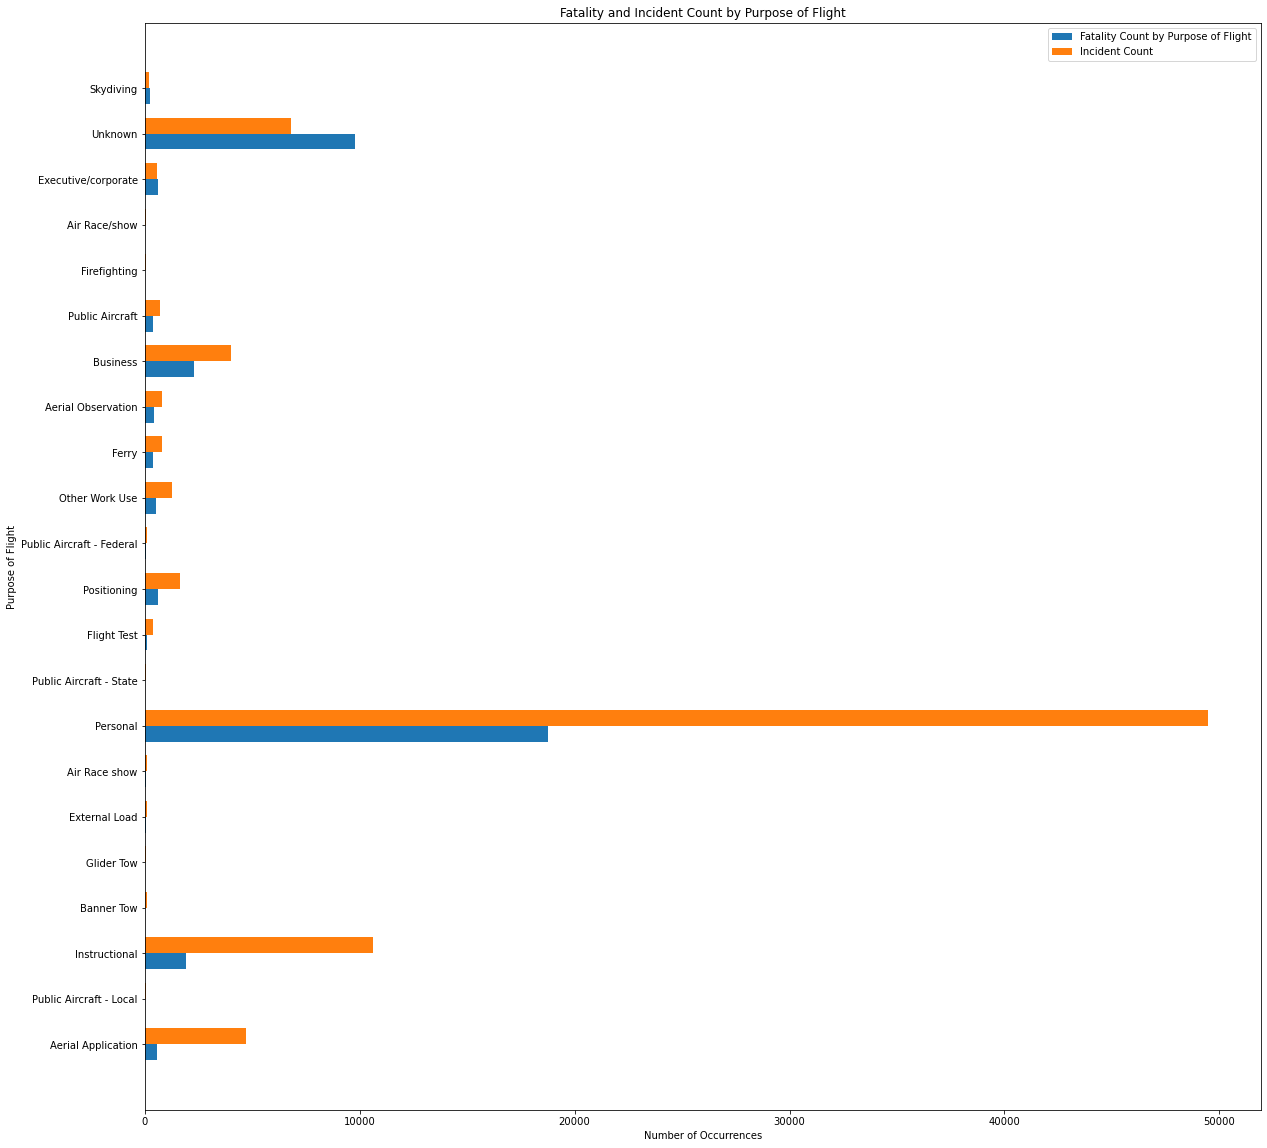

In [30]:

fig, ax = plt.subplots(figsize=(20, 20))
bar_height = 0.35

r1 = np.arange(len(aviation_grouped_purpose_filtered['Purpose.of.flight']))
r2 = [y + bar_height for y in r1]

plt.barh(r1, aviation_grouped_purpose_filtered['Total.Fatal.Injuries_sum'], height=bar_height, label='Fatality Count by Purpose of Flight')
plt.barh(r2, aviation_grouped_purpose_filtered['Count'], height=bar_height, label='Incident Count')

plt.ylabel('Purpose of Flight')
plt.xlabel('Number of Occurrences')
plt.title('Fatality and Incident Count by Purpose of Flight')

plt.yticks([y + bar_height / 2 for y in range(len(aviation_grouped_purpose_filtered['Purpose.of.flight']))], aviation_grouped_purpose_filtered['Purpose.of.flight'])
plt.legend()
plt.show()


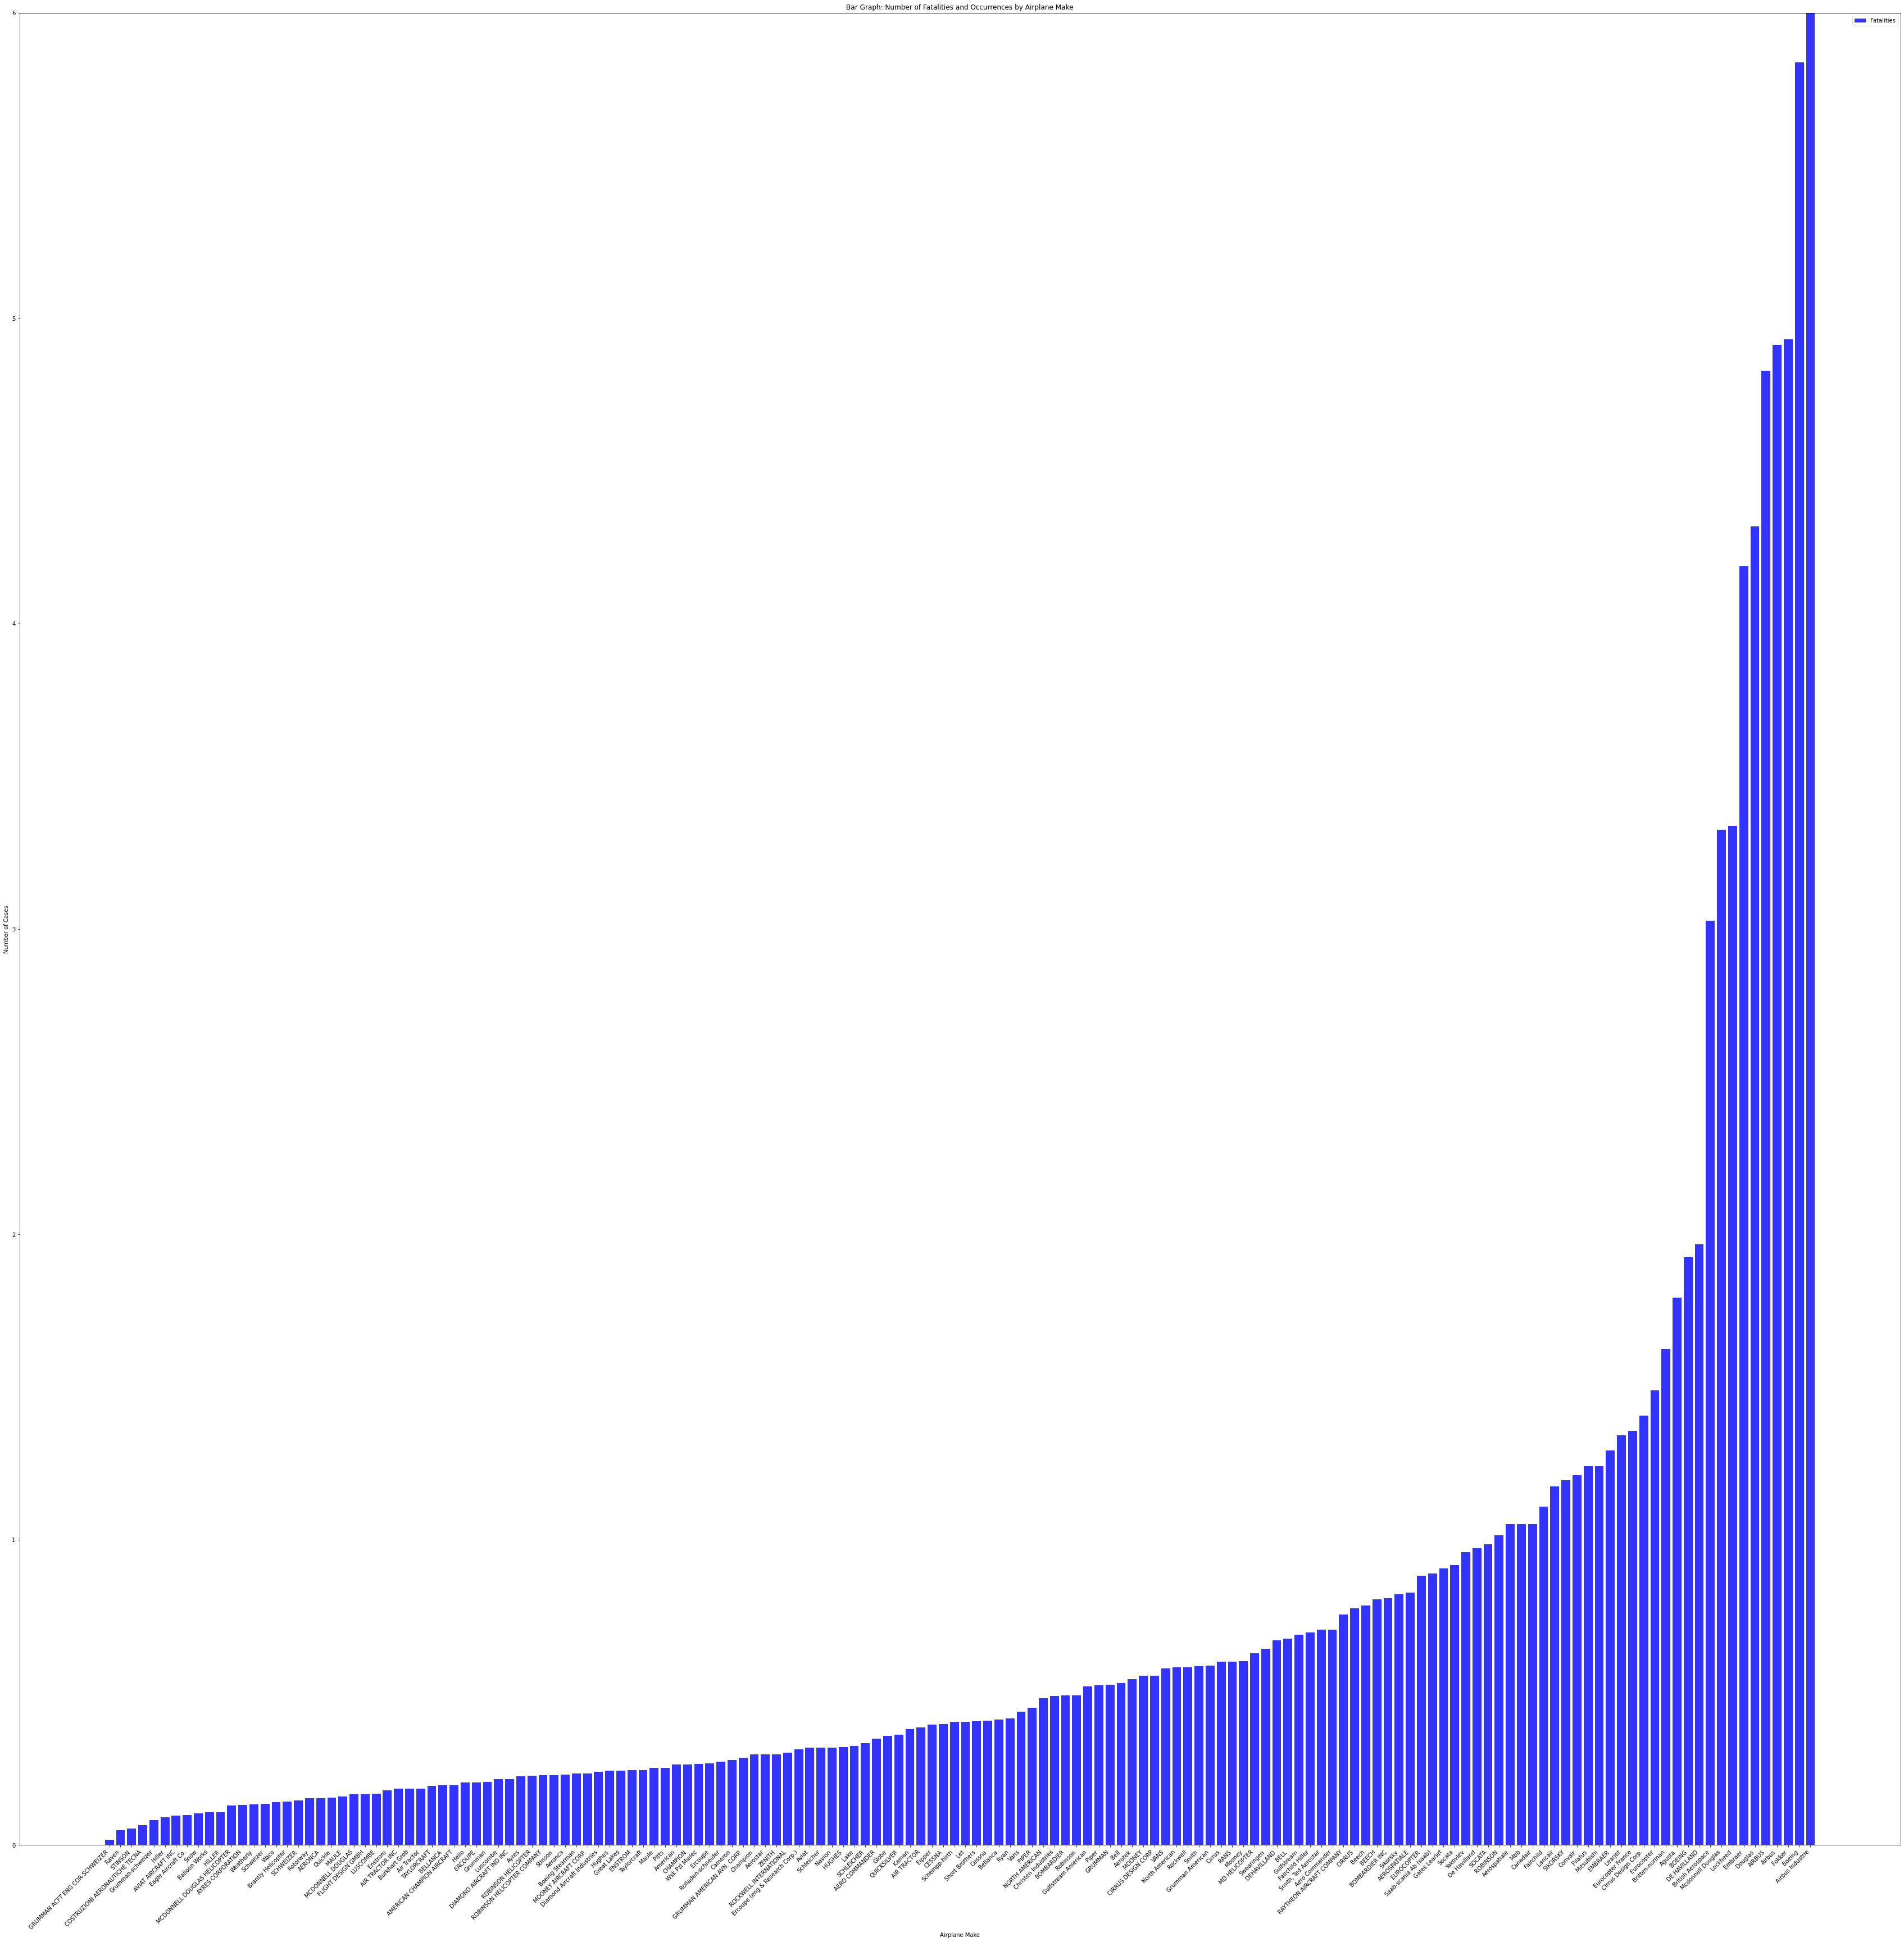

In [31]:
plt.figure(figsize=(60, 60))


plt.bar(aviation_grouped_make_filtered['Make'], aviation_grouped_make_filtered['Total.Fatal.Injuries_mean'], alpha=0.8, label='Fatalities', color='blue')
# plt.bar(aviation_grouped_make_filtered['Make'], aviation_grouped_make_filtered['Count'], alpha=0.8, bottom=aviation_grouped_make_filtered['Total.Fatal.Injuries_sum'], label='Occurrences', color='orange')

plt.title('Bar Graph: Number of Fatalities and Occurrences by Airplane Make')
plt.xlabel('Airplane Make')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')

plt.ylim(0,6)

plt.legend()
plt.show()


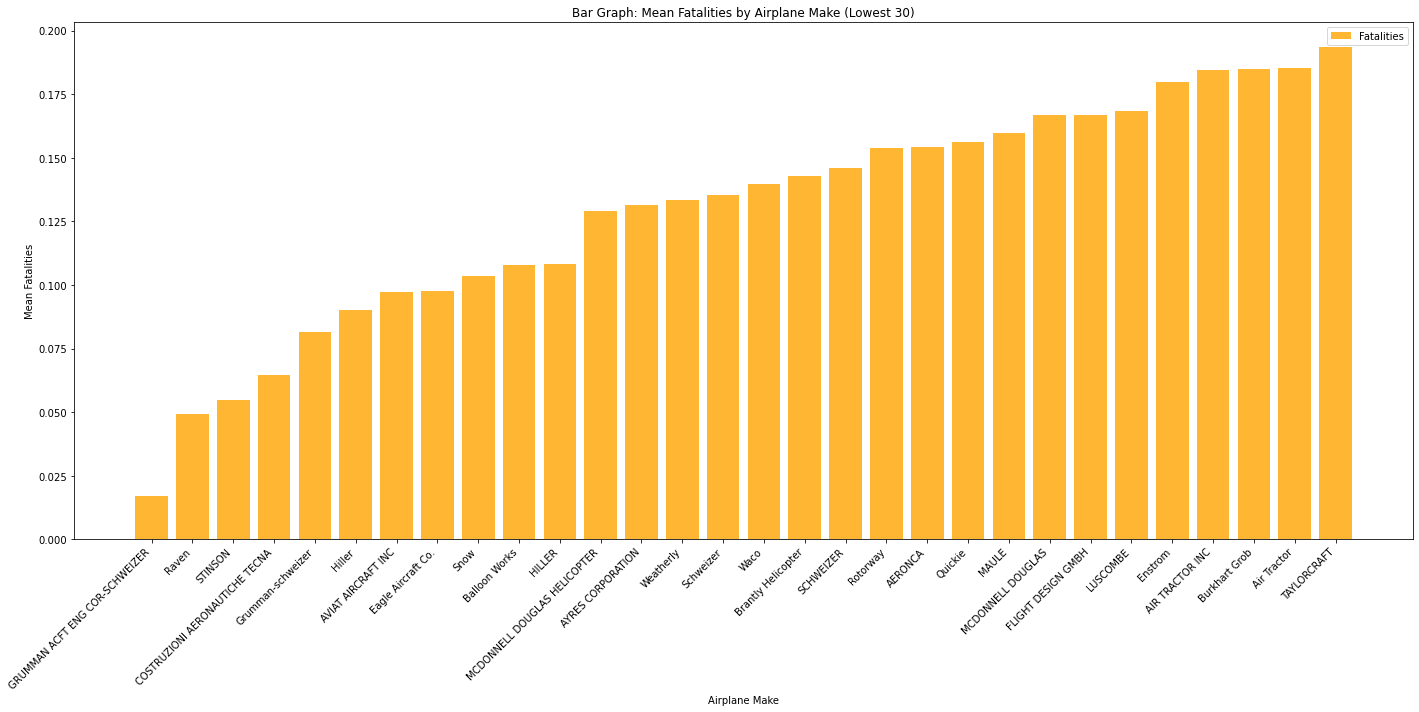

In [32]:
# Filtered list to only show the top 30 safest aircrafts by Fatality Mean
aviation_grouped_make_filtered_30 = aviation_grouped_make_filtered.head(30)
# aviation_grouped_make_filtered

plt.figure(figsize=(20, 10))

plt.bar(aviation_grouped_make_filtered_30['Make'], aviation_grouped_make_filtered_30['Total.Fatal.Injuries_mean'], alpha=0.8, label='Fatalities', color='Orange')

plt.title('Bar Graph: Mean Fatalities by Airplane Make (Lowest 30)')
plt.xlabel('Airplane Make')
plt.ylabel('Mean Fatalities')
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

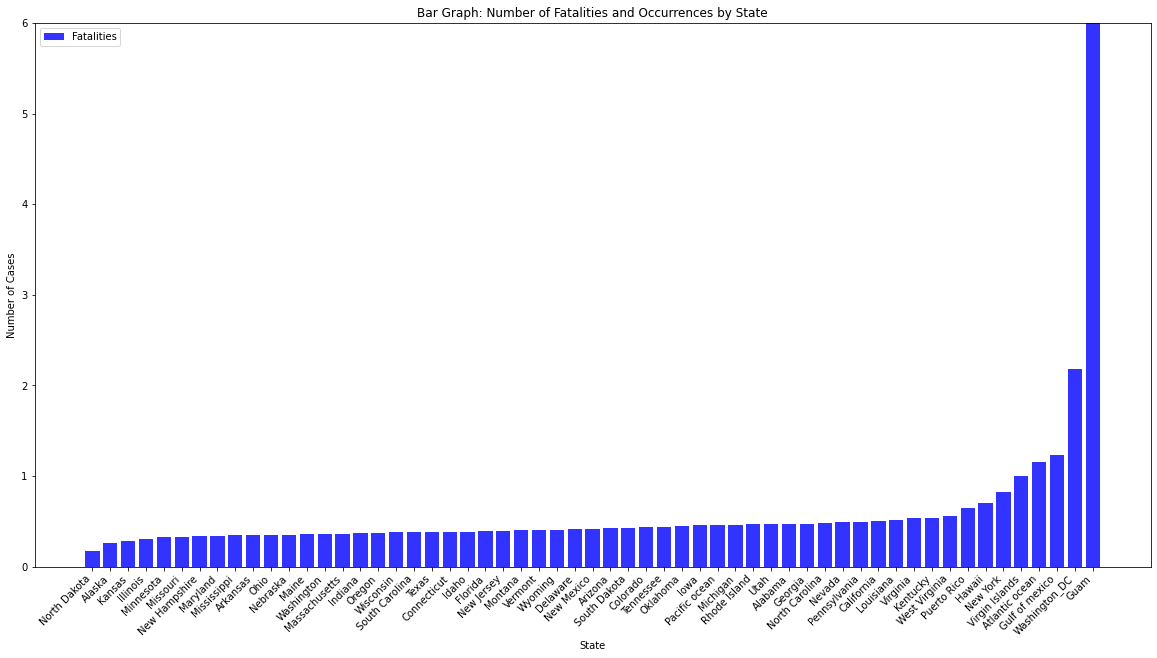

In [34]:
plt.figure(figsize=(20, 10))


plt.bar(aviation_grouped_location_data_sorted['US_State'], aviation_grouped_location_data_sorted['Total.Fatal.Injuries_mean'], alpha=0.8, label='Fatalities', color='blue')
# plt.bar(aviation_grouped_make_filtered['Make'], aviation_grouped_make_filtered['Count'], alpha=0.8, bottom=aviation_grouped_make_filtered['Total.Fatal.Injuries_sum'], label='Occurrences', color='orange')

plt.title('Bar Graph: Number of Fatalities and Occurrences by State')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')

plt.ylim(0,6)

plt.legend()
plt.show()